# Index

1. [Analysing the dataset](#Analysing-the-dataset)
    1. [Missing Values](#Missing-Values)
    1. [Distribution of Disease Types](#Distribution-of-Disease-Types)
    1. [Features by Type](#Features-by-Type)
    1. [Data Correlation](#Data-correlation)
1. [Improving the dataset](#Improving-the-dataset)
1. [Data Labeling & Encoding](#Data-labeling-&-encoding)
1. [Algorithms](#Algorithms)
    1. [Random Forest](#Random-Forest)
    1. [SVM](SVM)
    1. [K-NN](K-NN)

# Analysing the dataset

In [1]:
import pandas as pd

symptom_data = pd.read_csv('covid-symptoms.csv')
symptom_data.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY


## Missing Values

After a quick check of the csv file we did not find any missing values. To guarantee it however, we search the dataframe for any null/nan value.

In [2]:
symptom_data.isnull().values.any()

False

In [3]:
symptom_data.describe()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
count,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000
mean,0.520662,0.519762,0.519897,0.519358,0.496232,0.495850,0.325400,0.324253,0.324523,0.323465,0.323893,0.324455,0.422986,0.423234,0.184285,0.184285,0.184285,0.184285,0.519313,0.184240
std,0.499579,0.499615,0.499610,0.499631,0.499991,0.499988,0.468529,0.468100,0.468201,0.467804,0.467965,0.468176,0.494039,0.494077,0.387720,0.387720,0.387720,0.387720,0.499633,0.387684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Distribution of Disease Types

In [4]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [5]:
data_distribution = symptom_data.groupby(by=['TYPE']).count()
data_distribution

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
TYPE,,,,,,,,,,,,,,,,,,,,
ALLERGY,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381,16381
COLD,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024
COVID,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048,2048
FLU,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000


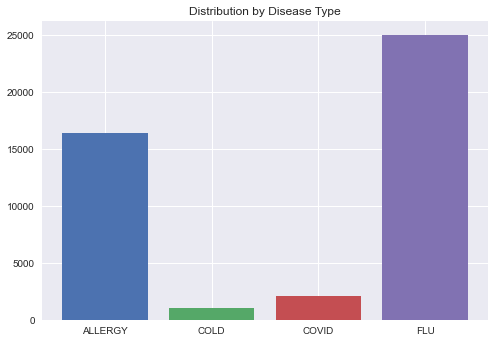

In [6]:
fig, ax = plt.subplots()

ax.set_title('Distribution by Disease Type')

ax.bar('ALLERGY', data_distribution.loc['ALLERGY', 'FEVER'])
ax.bar('COLD', data_distribution.loc['COLD', 'FEVER'])
ax.bar('COVID', data_distribution.loc['COVID', 'FEVER'])
ax.bar('FLU', data_distribution.loc['FLU', 'FEVER'])
del data_distribution

## Features by Type

In [7]:
import math

def plot_bars(symptom_data: pd.DataFrame):
    features = list(symptom_data.columns)
    features.remove('TYPE')

    types = symptom_data['TYPE'].unique()

    cols = math.ceil(math.sqrt(len(features)))
    rows = math.ceil(len(features) / cols)
    fig, axs = plt.subplots(rows, cols, sharex='col', sharey='row', figsize=(cols * 2.5, rows * 2.5))

    labels = {
        'COVID': 'C-19',
        'FLU': 'FLU',
        'ALLERGY': 'ALR',
        'COLD': 'COLD',
    }

    for i in range(len(features)):
        ax = axs[i % rows][i // rows]

        for disease in types:
            disease_df = symptom_data.loc[symptom_data['TYPE']==disease]
            total_disease = disease_df['TYPE'].count()
            with_feature = disease_df.loc[disease_df[features[i]] == 1, 'TYPE'].count()

            ax.bar([labels[disease]], [with_feature / total_disease])

        ax.set_ylim(0, 1)
        ax.set_title(features[i])

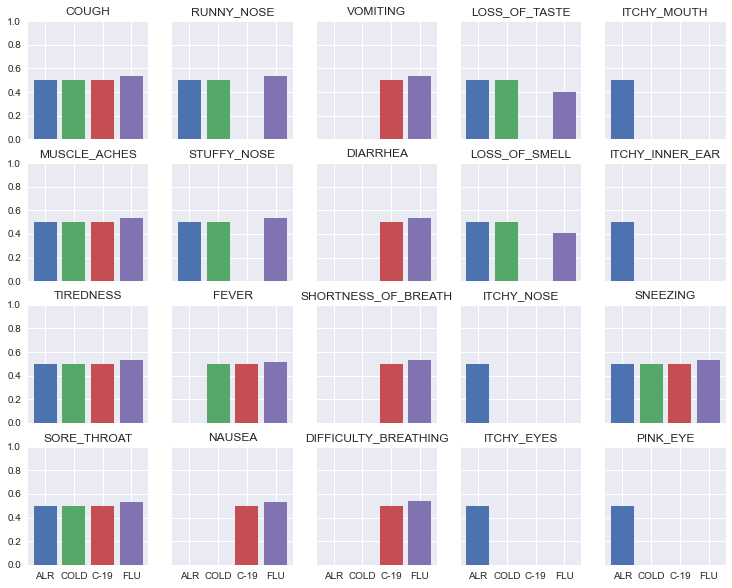

In [8]:
plot_bars(symptom_data)

## Data correlation

In [9]:
symptom_data.corr()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
COUGH,1.000000,-0.006751,-0.006131,-0.006357,-0.004079,-0.005263,0.013227,0.011657,0.010091,0.011686,0.011211,0.009665,0.023971,0.020439,-0.019659,-0.019659,-0.019659,-0.019659,-0.007885,-0.019656
MUSCLE_ACHES,-0.006751,1.000000,-0.005879,-0.005115,-0.004903,-0.004737,0.013419,0.009344,0.011051,0.009273,0.010917,0.005815,0.020134,0.020613,-0.018801,-0.018801,-0.018801,-0.018801,-0.004571,-0.018682
TIREDNESS,-0.006131,-0.005879,1.000000,-0.007378,-0.003460,-0.004285,0.012271,0.008773,0.009998,0.011203,0.012270,0.009956,0.019720,0.020929,-0.018930,-0.018930,-0.018930,-0.018930,-0.004401,-0.018927
SORE_THROAT,-0.006357,-0.005115,-0.007378,1.000000,-0.003828,-0.004744,0.012156,0.007886,0.009689,0.008196,0.010900,0.008877,0.022103,0.017297,-0.018415,-0.018415,-0.018415,-0.018415,-0.005801,-0.018529
RUNNY_NOSE,-0.004079,-0.004903,-0.003460,-0.003828,1.000000,0.041040,-0.007682,-0.005257,-0.008614,-0.004647,-0.008821,-0.006934,0.060959,0.060366,0.003582,0.003582,0.003582,0.003582,-0.004189,0.003698
STUFFY_NOSE,-0.005263,-0.004737,-0.004285,-0.004744,0.041040,1.000000,-0.005134,-0.006265,-0.008853,-0.009120,-0.008388,-0.007461,0.058063,0.059747,0.003946,0.003946,0.003946,0.003946,-0.002043,0.004061
FEVER,0.013227,0.013419,0.012271,0.012156,-0.007682,-0.005134,1.000000,0.280095,0.278506,0.277233,0.277221,0.279749,-0.050197,-0.049666,-0.330111,-0.330111,-0.330111,-0.330111,0.010489,-0.330062
NAUSEA,0.011657,0.009344,0.008773,0.007886,-0.005257,-0.006265,0.280095,1.000000,0.299449,0.301886,0.300841,0.303055,-0.041432,-0.040998,-0.329249,-0.329249,-0.329249,-0.329249,0.008333,-0.329200
VOMITING,0.010091,0.011051,0.009998,0.009689,-0.008614,-0.008853,0.278506,0.299449,1.000000,0.300497,0.300582,0.300948,-0.042111,-0.043136,-0.329452,-0.329452,-0.329452,-0.329452,0.009366,-0.329403
DIARRHEA,0.011686,0.009273,0.011203,0.008196,-0.004647,-0.009120,0.277233,0.301886,0.300497,1.000000,0.297675,0.301024,-0.042451,-0.044059,-0.328658,-0.328658,-0.328658,-0.328658,0.011435,-0.328609


From the correlation matrix we cannot conclude any relevant relationship between features

## Improving the data set

From the information gathered above, we merged many features, using the `max` method, as it works as a psuedo-and operator between the different values. For example we united all the itches into one unique feature.

In [10]:
symptom_data['ITCH'] = symptom_data[['ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH', 'ITCHY_INNER_EAR', 'PINK_EYE']].max(axis=1)
symptom_data.drop(columns=['ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH', 'ITCHY_INNER_EAR', 'PINK_EYE'], inplace=True);

symptom_data['SENSE_LOSS'] = symptom_data[['LOSS_OF_TASTE', 'LOSS_OF_SMELL']].max(axis=1)
symptom_data.drop(columns=['LOSS_OF_TASTE', 'LOSS_OF_SMELL'], inplace=True);

symptom_data['NOSE_PROBLEMS'] = symptom_data[['RUNNY_NOSE', 'STUFFY_NOSE']].max(axis=1)
symptom_data.drop(columns=['RUNNY_NOSE', 'STUFFY_NOSE'], inplace=True);

symptom_data['GASTRO_PROBLEMS'] = symptom_data[['DIARRHEA', 'NAUSEA', 'VOMITING']].max(axis=1)
symptom_data.drop(columns=['DIARRHEA', 'NAUSEA', 'VOMITING'], inplace=True);

symptom_data['BREATHING_PROBLEMS'] = symptom_data[['SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING']].max(axis=1)
symptom_data.drop(columns=['SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING'], inplace=True);

We then dropped other features entirely, as was the case with the COUGH, MUSCLE_ACHE, TIREDNESS, SORE_THROAT and SNEEZING columns.

These columns were very similar and all displayed a roughly equal distribution.

In [11]:
symptom_data.drop(columns=['COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'SNEEZING'], inplace=True)

In [12]:
# Reorder the TYPE column to end for consistency
type_series = symptom_data['TYPE']
symptom_data = symptom_data.drop(columns=['TYPE'])
symptom_data['TYPE'] = type_series

In [13]:
symptom_data.head()

,FEVER,ITCH,SENSE_LOSS,NOSE_PROBLEMS,GASTRO_PROBLEMS,BREATHING_PROBLEMS,TYPE
0,0,1,1,1,0,0,ALLERGY
1,0,1,1,0,0,0,ALLERGY
2,0,1,1,0,0,0,ALLERGY
3,0,1,1,1,0,0,ALLERGY
4,0,1,1,1,0,0,ALLERGY


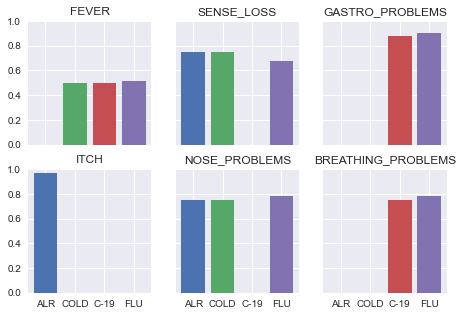

In [14]:
plot_bars(symptom_data)

# Data labeling & encoding

In [15]:
from sklearn.preprocessing import LabelEncoder# creating initial dataframe
disease_types = ('ALLERGY','COLD','COVID','FLU')
types_label = pd.DataFrame(symptom_data, columns=['TYPE'])# creating instance of labelencoder

labelencoder = LabelEncoder()# Assigning numerical values and storing in another column

types_label['TYPE_LABELED'] = labelencoder.fit_transform(types_label['TYPE'])
types_label.drop(columns=['TYPE']);

In [16]:
# We can extract the data in this format from pandas like this:
all_inputs = symptom_data.loc[:, symptom_data.columns != 'TYPE'].values

# Similarly, we can extract the class labels
all_labels = types_label['TYPE_LABELED'].values

In [17]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

# Algorithms

## Random Forest

In [18]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

def random_forest(training_inputs, testing_inputs, training_classes, testing_classes):
    # Create the classifier
    decision_tree_classifier = RandomForestClassifier()

    # Train the classifier on the training set
    decision_tree_classifier.fit(training_inputs, training_classes)

    # Validate the classifier on the testing set using classification accuracy
    return decision_tree_classifier.score(testing_inputs, testing_classes), decision_tree_classifier.score(training_inputs, training_classes)

In [19]:
random_forest(training_inputs, testing_inputs, training_classes, testing_classes)

(0.9276588087097355, 0.9347610906145956)

## SVM

In [20]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(training_inputs, training_classes)

predicted_values_test = clf.predict(testing_inputs)

predicted_values_train = clf.predict(training_inputs)

In [21]:
from sklearn import metrics

print("Accuracy From Testing Classes:",metrics.accuracy_score(testing_classes, predicted_values_test))
print("Accuracy From Training Classes:",metrics.accuracy_score(training_classes, predicted_values_train))

Accuracy From Testing Classes: 0.9283786215583948
Accuracy From Training Classes: 0.9345811212093944


## K-NN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

def KNN(training_inputs, testing_inputs, training_classes, testing_classes, n_neighbors):

    neigh = KNeighborsClassifier(n_neighbors)
    neigh.fit(training_inputs,training_classes)
    
    predicted_values_test = neigh.predict(testing_inputs)
    predicted_values_train = neigh.predict(training_inputs)
    
    print("Accuracy From Testing Classes:",metrics.accuracy_score(testing_classes, predicted_values_test))
    print("Accuracy From Training Classes:",metrics.accuracy_score(training_classes, predicted_values_train))

KNN(training_inputs, testing_inputs, training_classes, testing_classes, 10)

Accuracy From Testing Classes: 0.9295483174374662
Accuracy From Training Classes: 0.9336812741833889
